# Classification of Pulsars using Binary Logistic Regression from Scratch
(Whether or not a star is a pulsar)

## What is a Pulsar?

A pulsar is a rapidly rotating neutron star that emits beams of radiation from its magnetic poles, which are not aligned with its rotational axis. As the stars spin, the beams of radiation hit earth which from our perspective are regular pulses of light

![alt text](pulsar.jpg)

The average intensity of these regular pulses known as the mean integrated profile (MIP) of the pulsar can be measured. The MIP contains significantly less noise and variance compared to single pulses reveal a characteristic shape. 

Taking the moments of the MIP eg. 1st, 2nd, 3rd and 4th moments such as mean, variance, skewness and kurtosis allows us to effectively predict whether or not a star is a pulsar; becoming a binary classification problem. 

One of the most common algorithms that can be used to solve binary classificiation problem is logistic regression which in this report, we wil be implementing from scratch

## Understanding Logistic Regression and its Connection to Numerical Methods

Just like linear regression, we have to define some sort of "loss" function that we can optimise to obtain our parameters. 

Unlike linear regression, we cannot use the least squares approximation here since the problem is binary and you would just get a sum of 0s and 1s.

Instead we have to turn to a more probabalistic approach: maximum likelihood estimation (MLE).

The underlying function that logistic regression uses is the sigmoid function 

$$
\sigma(z) = \frac{1}{1+e^{-z}}
$$

where x is a vector in the dimension of the feature space (number of features)

What are the parameters we are learning? 

We still use a linear model $z = w^Tx$ but we fit this linear model into the sigmoid function so it is either 1 or 0

The **loss function** (also called the **cross-entropy loss** or **log loss**) is the negative log-likelihood:

$$
J(w) = -\log L(w) = -\sum_{i=1}^{n} \left[ y_i \log(\sigma(w^Tx_i)) + (1-y_i) \log(1-\sigma(w^Tx_i)) \right]
$$

## Optimisation Approach 

To find the optimal parameters $w$, we minimize this loss function. In this project, I used 2 different approaches: 
1. Multi-dimensional Gradient descent 
2. Multi-dimensional Newton-Raphson

which requires the calculation of the gradient of this loss function. The gradient can be calculated analytically or numerically - both methods are used in this project

## Data Exploration and Understanding 

In [1]:
import pandas as pd 

FILEPATH = '/Users/thananpornsethjinda/Desktop/pulsar-pred/data/pulsar_data.csv'

df = pd.read_csv(FILEPATH)

df

,Unnamed: 0,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...,...
17893,17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


We have to standardise the values so that the magnitude do not affect the predictions and also split the data into training and testing data so we can test out model

In [31]:
from src.preprocessor import Preprocessor
X_train_processed, X_test_processed, y_train, y_test = Preprocessor(df=df).main()

Starting preprocessing pipeline ...
Splitting data
Splitting successful, starting scaling process
Scaling successful!
Processing pipeline completed!


In [27]:
from src.model import LogisticRegressionModel

lr = LogisticRegressionModel(X_train_processed=X_train_processed, X_test_processed=X_test_processed, y_train=y_train)

## Convergence Plots (Optimal)

running newton's method
params found!


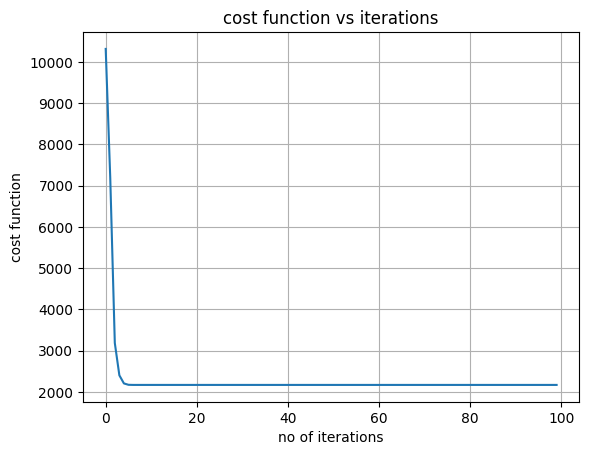

In [32]:
start = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

lr.newton_raphson(start=start, n_iter=100)

y_pred_newton = lr.predict()


gradient descent by using numerical gradient ...


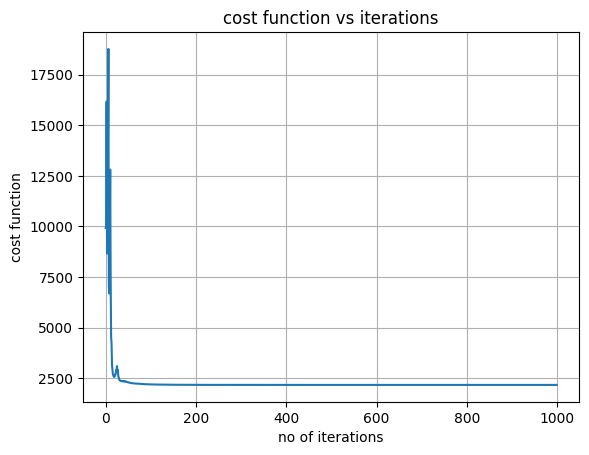

In [33]:
start = [0, 0, 0, 0, 0, 0, 0, 0]

lr.gradient_descent(start=start, lr=0.001, n_iter=1000, method="numerical")

y_pred_ngd = lr.predict()

gradient descent by using analytical gradient ...
found params first


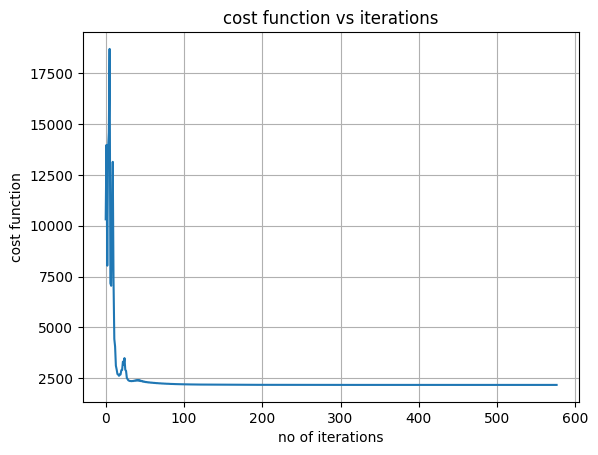

In [34]:
start = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

lr.gradient_descent(start=start, lr=0.001, n_iter=1000, method="analytical")

y_pred_agd = lr.predict()

## Convergence Plots (Sub-Optimal)

gradient descent by using analytical gradient ...


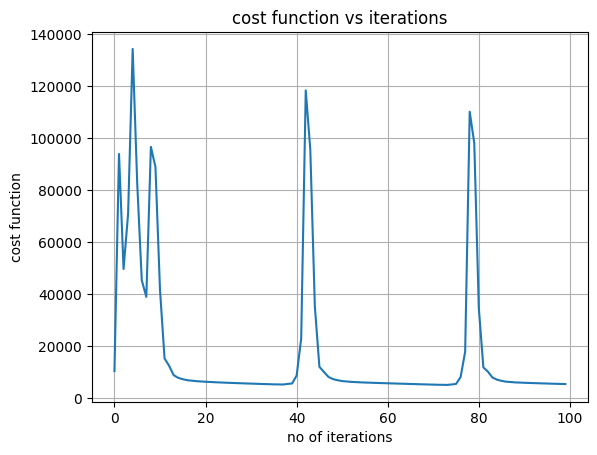

array([19.38684726,  9.14942592, 30.57147883, 65.45916204, -3.18528213,
        2.82241374,  4.72332473, -4.64840986])

In [35]:
start = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

lr.gradient_descent(start=start, lr=0.01, n_iter=100, method="analytical")

## Results and Discussion

From the optimal parameters opbtained we can find out the "performance " of the model by looking at the ROC curve and the confsusion matrix. These metrics would serve as indiciatators as to how well the pamodel actually classifies the pulsars

In [36]:
from sklearn.metrics import roc_auc_score, confusion_matrix

In [37]:
print(roc_auc_score(y_true=y_test, y_score=y_pred_newton))

print(confusion_matrix(y_true=y_test, y_pred=y_pred_newton, normalize='true'))

0.9246111211112111
[[0.9803198  0.0196802 ]
 [0.13109756 0.86890244]]


In [38]:
print(roc_auc_score(y_true=y_test, y_score=y_pred_ngd))

print(confusion_matrix(y_true=y_test, y_pred=y_pred_ngd, normalize='true'))

0.9247648726487264
[[0.98062731 0.01937269]
 [0.13109756 0.86890244]]


In [39]:
print(roc_auc_score(y_true=y_test, y_score=y_pred_agd))

print(confusion_matrix(y_true=y_test, y_pred=y_pred_agd, normalize='true'))

0.9246111211112111
[[0.9803198  0.0196802 ]
 [0.13109756 0.86890244]]


## Conclusion

In this report we have found how we can you numerical methods to create a mathematical machine learning model to classify pulsars from scratch. It turns out our model performs pretty well too considering we did not carry out hyperparameter fine-tuning!
